# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Reva Alief Fathoni
- **Email:** m180d4ky2511@bangkit.academy
- **ID Dicoding:** revalief809

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?
- Pertanyaan 2: Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun?
- Pertanyaan 3: Bagaimana korelasi antara suhu terhadap total order bike riding?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling



### Gathering Data

In [6]:
data = pd.read_csv("/content/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Assessing Data

In [ ]:
data.duplicated().sum()

In [ ]:
data.describe()

### Cleaning Data

In [13]:
## Mengubah jenis data pada kolom

data['dteday'] = pd.to_datetime(data['dteday'])
data['season'] = data.season.astype('category')
data['mnth'] = data.mnth.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weathersit'] = data.weathersit.astype('category')

In [ ]:
data.info()


In [14]:
# Mengonversi data pada kolom kategori variabel berdasarkan kriteria
# yang ditunjukkan pada file readme.txt

# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
data.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
data.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
data.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
data.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
data.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [16]:
# Drop kolom yang tidak digunakan dalam data
data = data.drop("instant", axis=1)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Merubah nama kolom

data.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [21]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

data['temp'] = data['temp']*41
data['atemp'] = data['atemp']*50
data['humidity'] = data['humidity']*100
data['windspeed'] = data['windspeed']*67

In [ ]:
data.head(10)


## Exploratory Data Analysis (EDA)

Univariate Analysis

Histogram grafik

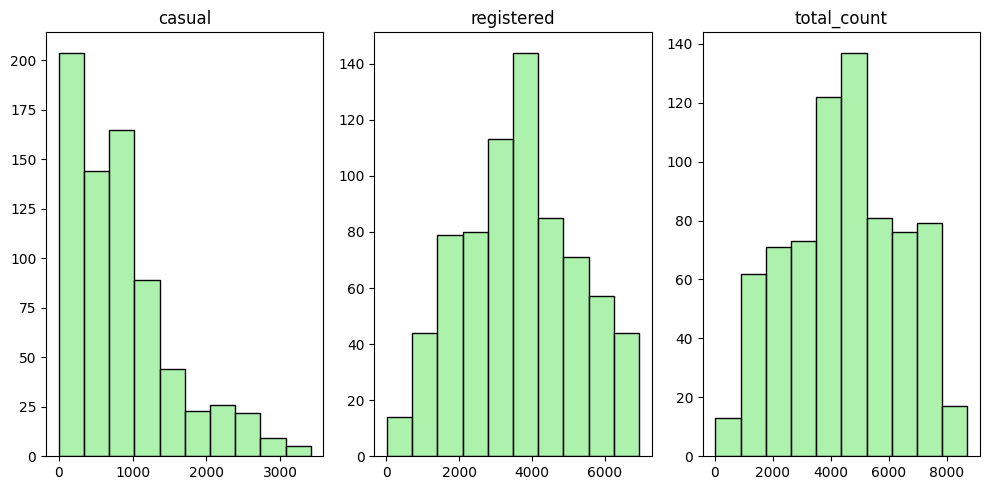

In [40]:
columns = ['casual', 'registered', 'total_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=data[columns[i]], ax=ax, bins=10, color='lightgreen')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

Boxplot grafik



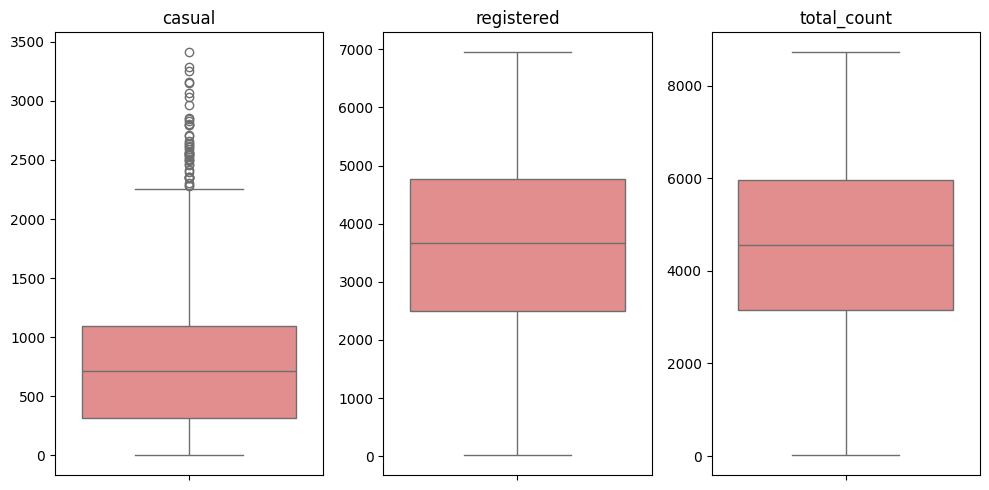

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.boxplot(y=data[columns[i]], ax=ax, color='lightcoral')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

Histogram untuk casual menunjukkan right-skewed distribution.

Histogram untuk registered dan total_count menunjukkan distribusi normal.

Boxplot casual juga menunjukkan adanya outlier.

Bivariate Analysis

<ipython-input-39-5c812cd21809>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-39-5c812cd21809>:5: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


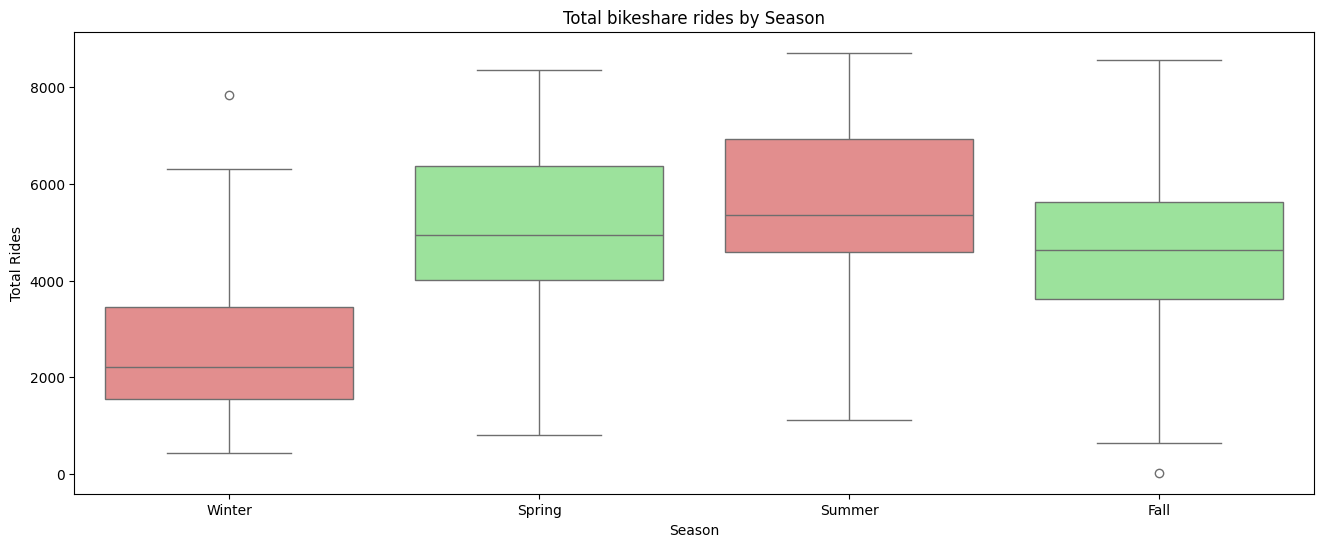

In [39]:
# Menghitung korelasi suhu terhadap jumlah bikesharing
plt.figure(figsize=(16,6))

# Membuat boplot menggunakan seaborn function
sns.boxplot(
    x="season",
    y="total_count",
    data=data,
    palette=["lightcoral", "lightgreen"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Season")

# Show the plot
plt.show()

Boxplot korelasi bulan terhadap pengguna bikeshare


**Bikesharing memiliki permintaan tertinggi pada musim Summer.**

<ipython-input-41-b9f442e49db5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-41-b9f442e49db5>:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


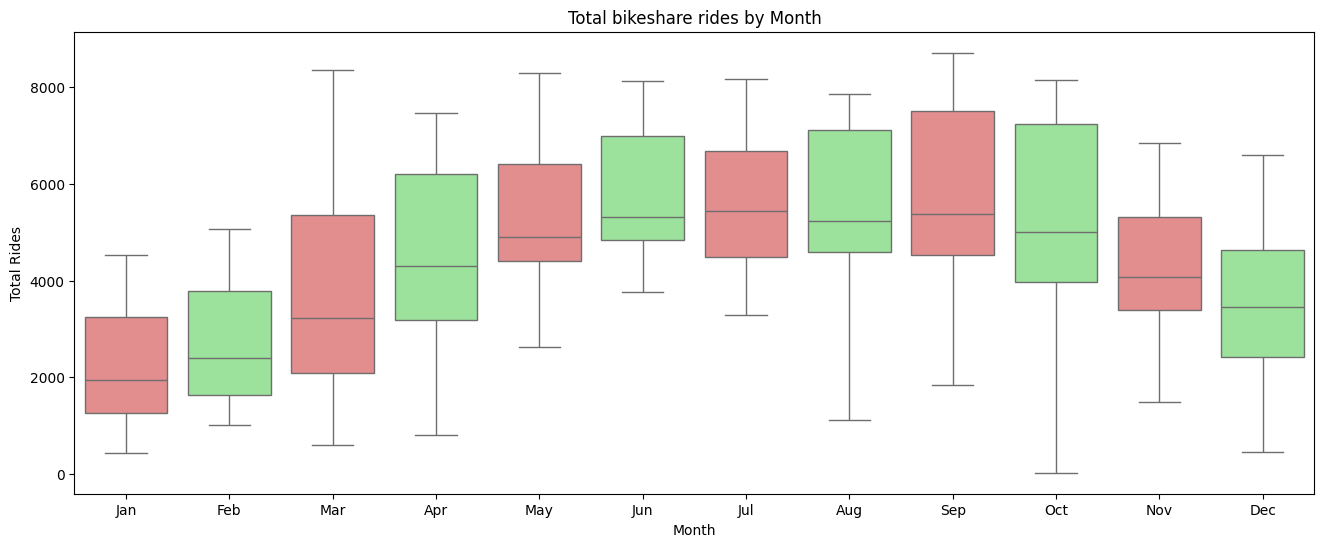

In [41]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="month",
    y="total_count",
    data=data,
    palette=["lightcoral", "lightgreen"]
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Month")

# Show the plot
plt.show()

**Bikesharing memiliki permintaan tertinggi pada periode bulan Juni hingga bulan September.**



## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?

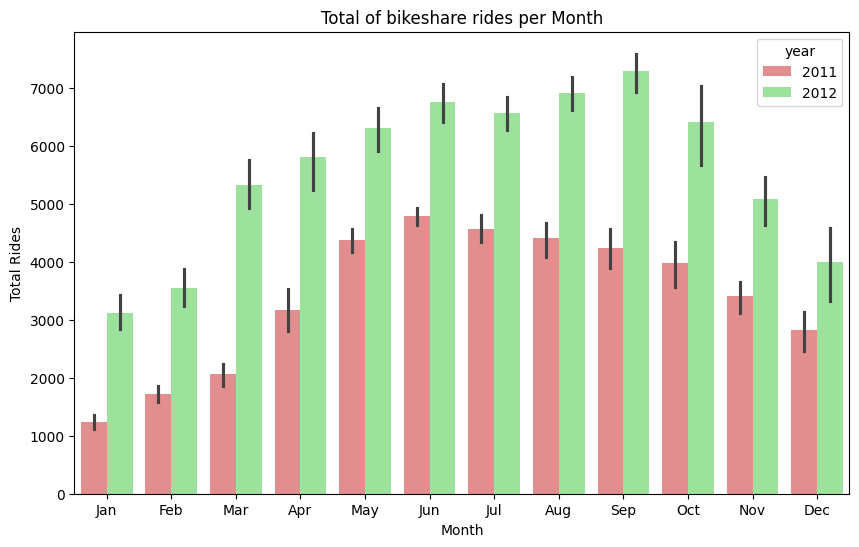

In [35]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='total_count', data=data, hue='year', palette=["lightcoral", "lightgreen"])

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Month")

plt.show()

**Permintaan akan bikesharing memiliki permintaan tertinggi pada bulan September untuk tahun 2012.**

**Permintaan akan bikesharing memilik permintaan tertinggi pada bulan Juni untuk tahun 2011.**

### Pertanyaan 2: Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun?

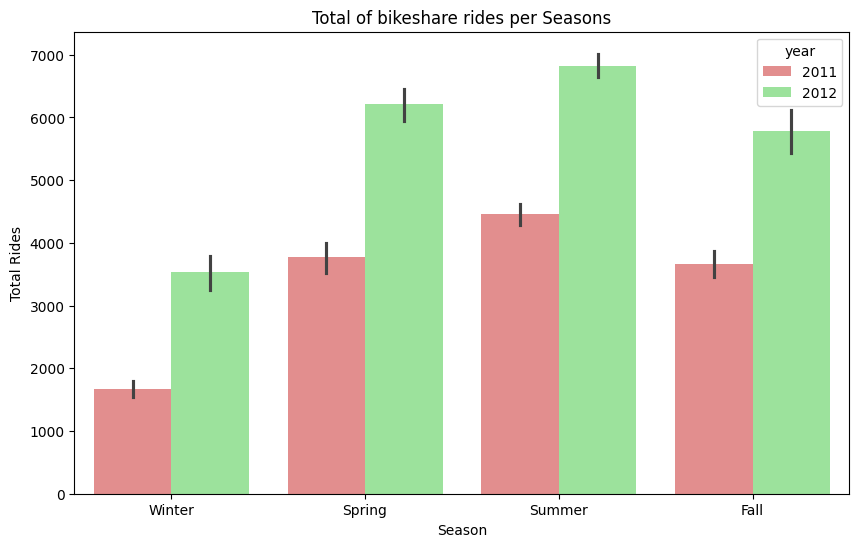

In [36]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='total_count', data=data, hue='year', palette=["lightcoral", "lightgreen"] )

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Seasons")

plt.show()

**Permintaan akan bikesharing memiliki permintaan paling tinggi pada summer untuk tahun 2011.**

**Permintaan akan bikesharing memiliki permintaan paling tinggi pada summer untuk tahun 2012.**

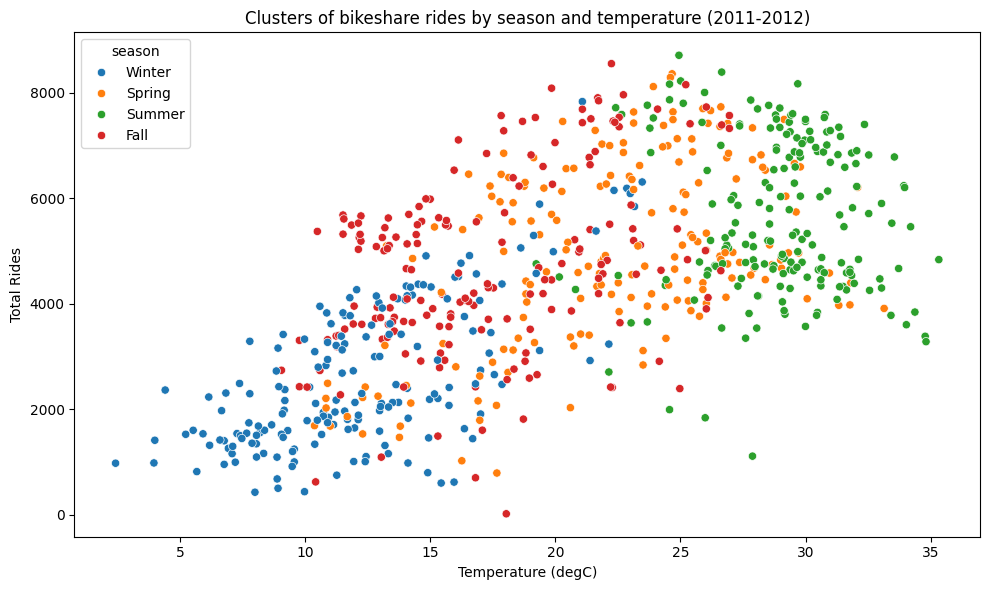

In [42]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='total_count', data=data, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

**Order bikesharing memiliki nilai minimum pada winter.**

**Seiring dengan meningkatnya temperatur, permintaan bikesharing semakin meningkat. Permintaan akan bikesharing memiliki nilai tertinggi pada summer.**

**Permintaan akan bikesharing memiliki permintaan terbanyak pada rentang suhu 20-30 derajat Celcius atau pada periode summer dan fall**

## Conclusion

- pertanyaan 1: Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?
- pertanyaan 2: Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun?
- pertanyaan 3: Bagaimana korelasi antara suhu terhadap total order bike riding?

- Jawaban 1:
 Order bike riding memiliki order terbanyak secara berturut di bulan Juni dan September pada tahun 2011 dan 2012.

- Jawaban 2:
 Musim summer merupakan musim yang memiliki pengguna bikeriding terbanyak dalam 1 tahun.

- Jawaban 3:
Permintaan akan bikeriding relatif rendah pada suhu kurang dari 20 derajat Celcius.

Permintaan bikeriding relatif tinggi ketika pada suhu 25-30 derajat Celcius.